In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
arr = []
for i in range (1, 32):
    day = pd.read_csv('/dataset/dds_datasets/data_nyt/nyt' + str(i) + '.csv')
    day['Day'] = i
    arr.append(day)
data = pd.concat(arr)
dataf = data.copy()
bounds = ['-1', '0', '18'  , '25', '35', '45', '55', '65', float('inf')]
labels = ['NoN', '<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

dataf['age_group'] = pd.cut(dataf['Age'], bins=bounds, labels=labels)

dataf_signed = dataf[dataf['Signed_In'] == 1]
dataf_unsigned = dataf[dataf['Signed_In'] == 0]

dataf_signed = dataf_signed.drop('Signed_In', axis=1)

print(dataf_signed)
print(dataf)


        Age  Gender  Impressions  Clicks  Day age_group
0        36       0            3       0    1     35-44
1        73       1            3       0    1       65+
2        30       0            3       0    1     25-34
3        49       1            3       0    1     45-54
4        47       1           11       0    1     45-54
...     ...     ...          ...     ...  ...       ...
440106   18       0            4       0   31       <18
440107   41       1            4       0   31     35-44
440109   22       1            3       0   31     18-24
440110   59       0            5       1   31     55-64
440111   29       1            4       0   31     25-34

[9292255 rows x 6 columns]
        Age  Gender  Impressions  Clicks  Signed_In  Day age_group
0        36       0            3       0          1    1     35-44
1        73       1            3       0          1    1       65+
2        30       0            3       0          1    1     25-34
3        49       1            3

C:\Users\LEGION\AppData\Local\Temp\ipykernel_15468\2873910257.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_data = dataf.groupby('age_group').agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()


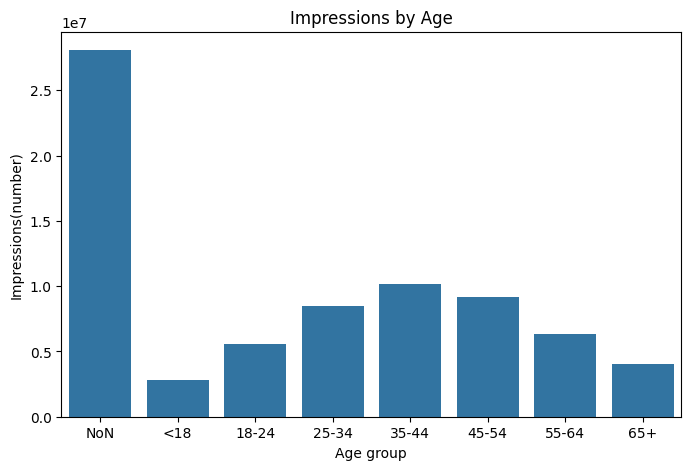

In [3]:

age_group_data = dataf.groupby('age_group').agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()
age_group_data['CTR'] = age_group_data['Clicks'] / age_group_data['Impressions']

plt.figure(figsize=(8,5))
sb.barplot(x='age_group', y='Impressions', data= age_group_data)
plt.title('Impressions by Age')
plt.xlabel('Age group')
plt.ylabel('Impressions(number)')
plt.show()
#перегляди по віковим групам

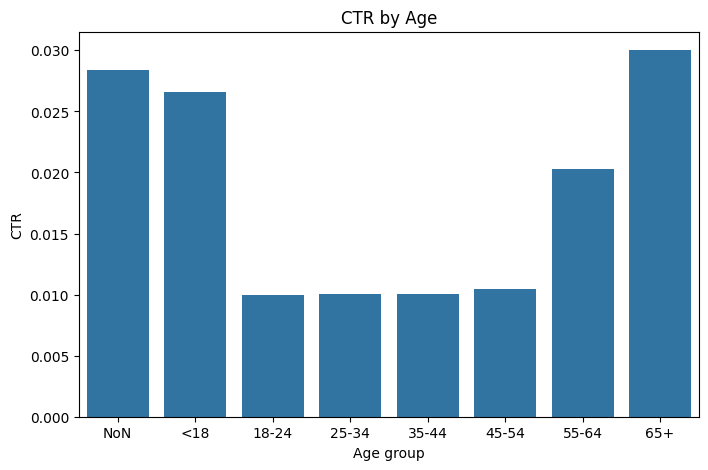

In [4]:
plt.figure(figsize=(8,5))
sb.barplot(x='age_group', y='CTR', data= age_group_data)
plt.title('CTR by Age')
plt.xlabel('Age group')
plt.ylabel('CTR')
plt.show()
#Кліки до показів по віковим групам

При аналізі отриманих рельтатів бачимо, що кількість переглядів досягає свого піку для середньої вікової групи (35-44), проте якщо звернути увагу на CTR, то стає очевидно, що для більшості вікових категорій не вистачає часу на споживання інформації, і на пік виходять групи до 18 та після 55, тобто вікові групи у яких кількість вільного часу значно більша через відсутність повноцінних робіт.

C:\Users\LEGION\AppData\Local\Temp\ipykernel_15468\3720120689.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_signed = dataf_signed.groupby(['age_group', 'Gender']).agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()


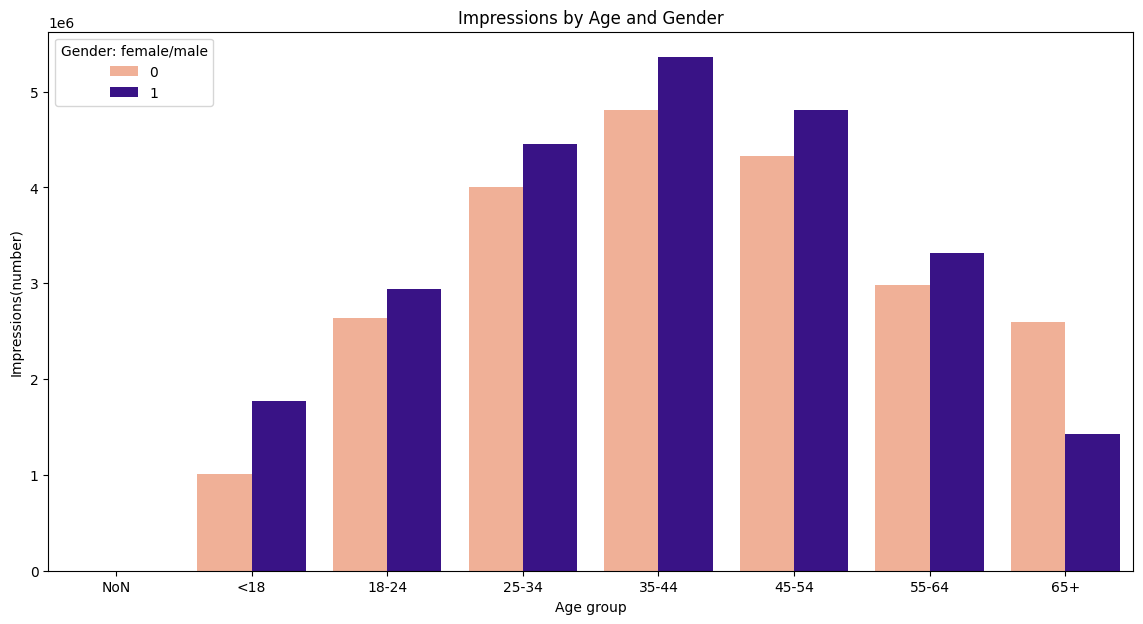

In [5]:
days_signed = dataf_signed.groupby(['age_group', 'Gender']).agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()
days_signed['CTR'] = days_signed['Clicks'] / days_signed['Impressions']

plt.figure(figsize=(14,7))
sb.barplot(x='age_group', y='Impressions', hue='Gender', data= days_signed, palette = ('#fa8','#309'))
plt.title('Impressions by Age and Gender')
plt.xlabel('Age group')
plt.ylabel('Impressions(number)')
plt.legend(title='Gender: female/male', loc='upper left')
plt.show()
#перегляди по віковим групам поділенні на стать

C:\Users\LEGION\AppData\Local\Temp\ipykernel_15468\3268911196.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clicks_amount = dataf_signed.groupby(['age_group', 'Gender']).agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()


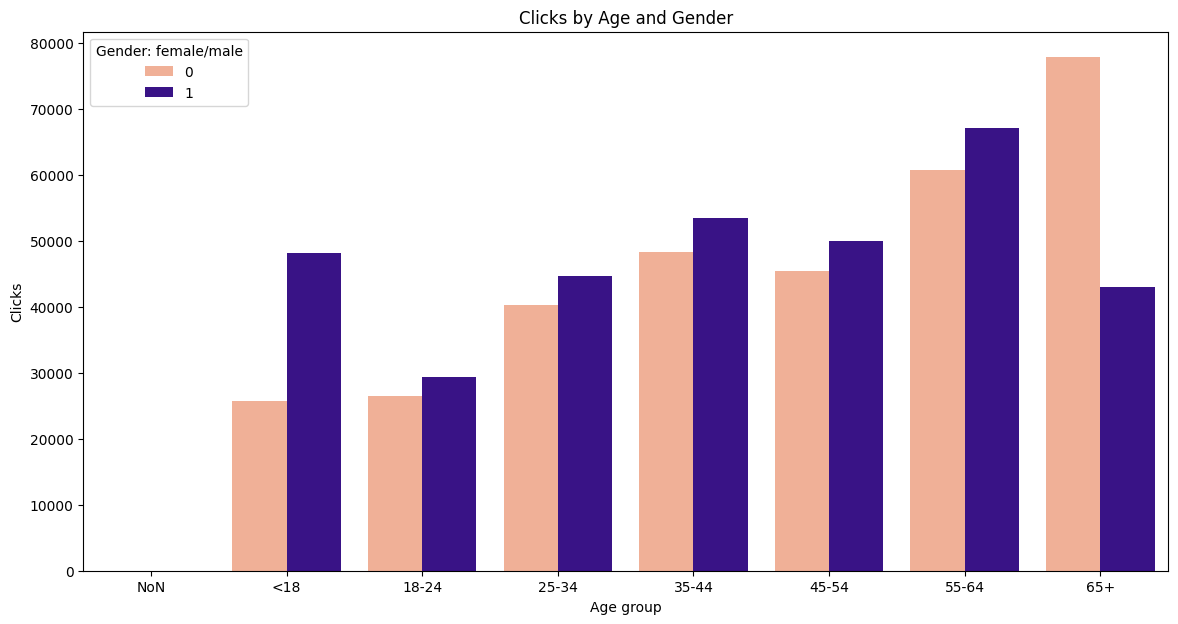

In [6]:
clicks_amount = dataf_signed.groupby(['age_group', 'Gender']).agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()
plt.figure(figsize=(14,7))
sb.barplot(x='age_group', y='Clicks', hue='Gender', data= clicks_amount, palette = ('#fa8','#309'))
plt.title('Clicks by Age and Gender')
plt.xlabel('Age group')
plt.ylabel('Clicks')
plt.legend(title='Gender: female/male', loc='upper left')
plt.show()
#Кліки по віковим групам поділенні на стать

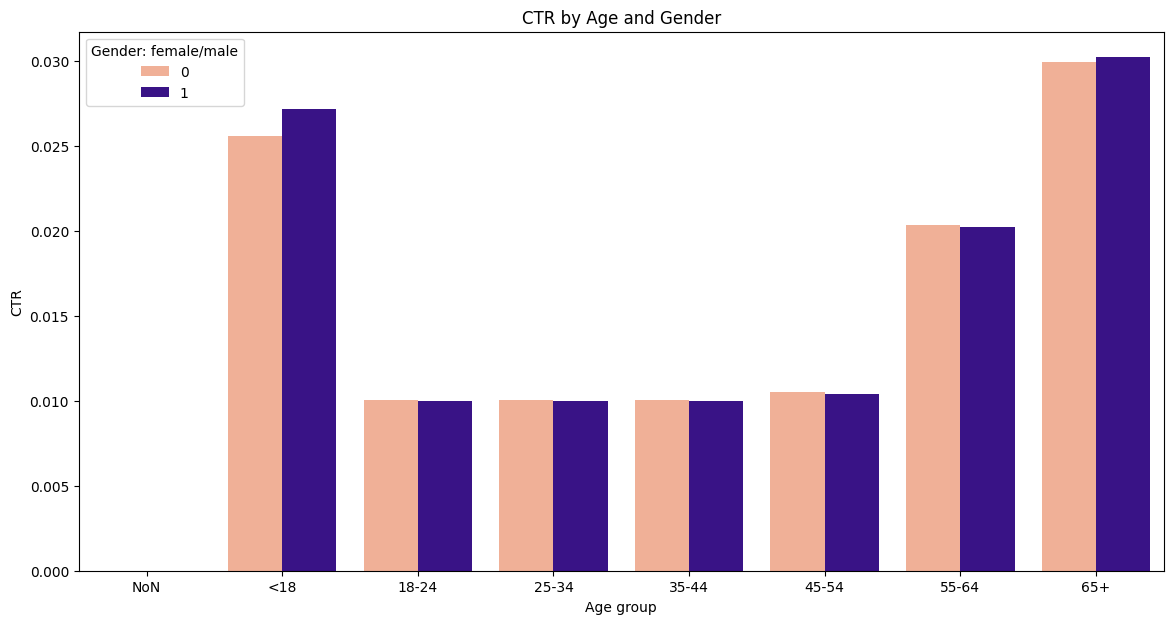

In [7]:
plt.figure(figsize=(14,7))
sb.barplot(x='age_group', y='CTR', hue='Gender', data= days_signed, palette = ('#fa8','#309'))
plt.title('CTR by Age and Gender')
plt.xlabel('Age group')
plt.ylabel('CTR')
plt.legend(title='Gender: female/male', loc='upper left')
plt.show()
#Кліки до показів по віковим групам поділенні на стать

Після поділу попередніх даних на дві статі, бачимо, що суттьєвої інформації отримати нам не вдалося. Лише варто підмітити, що чоловіки до 18 років значно активніші в переглядах, після чого існує паритет аж до віку 65+, де жінки значно переважають чоловіків, що можна пов'язати з середньою тривалістю життя жінок та чоловіків

In [8]:
# Загальна кількість кліків
total_clicks = dataf_signed['Clicks'].sum()
total_users = dataf_signed['Impressions'].sum()
average_clicks_per_user = total_clicks / total_users

sorted_age_group_clicks = dataf_signed.groupby('age_group').agg({'Clicks': 'sum', 'Impressions': 'sum'}).reset_index()
sorted_age_group_clicks['Average_Clicks'] = sorted_age_group_clicks['Clicks'] / sorted_age_group_clicks['Impressions']
sorted_age_group_clicks = sorted_age_group_clicks.sort_values(by='age_group')

print(sorted_age_group_clicks)

  age_group  Clicks  Impressions  Average_Clicks
0       NoN       0            0             NaN
1       <18   73922      2780357        0.026587
2     18-24   55753      5575517        0.010000
3     25-34   84864      8463722        0.010027
4     35-44  101789     10167142        0.010012
5     45-54   95374      9137862        0.010437
6     55-64  127838      6299749        0.020293
7       65+  120780      4023057        0.030022


C:\Users\LEGION\AppData\Local\Temp\ipykernel_15468\1285396488.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sorted_age_group_clicks = dataf_signed.groupby('age_group').agg({'Clicks': 'sum', 'Impressions': 'sum'}).reset_index()


Далі я виконав сортування переглядів для чоловіків та жінок у загальному по дням, з чого видно, що у нашому тижні піки активності припадають на вихідні дні, адже періодичність у саме 7 днів

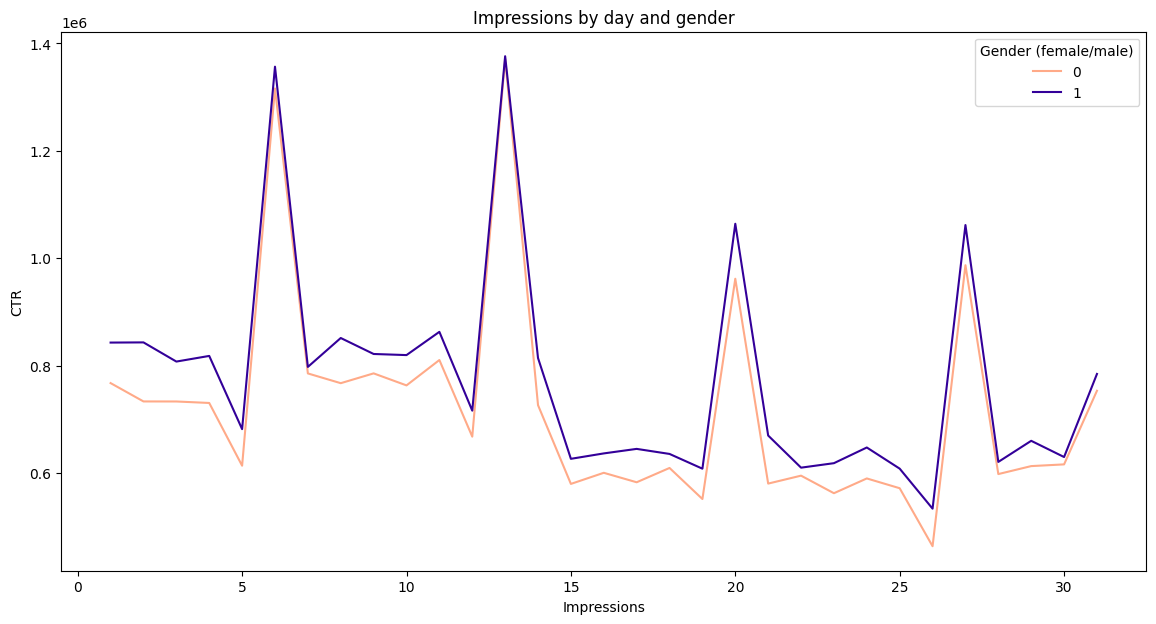

In [9]:
days_gender = dataf_signed.groupby(['Day', 'Gender']).agg({ 'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()
days_gender['CTR'] = days_gender['Clicks'] / days_gender['Impressions']

plt.figure(figsize=(14,7))
sb.lineplot(x='Day', y='Impressions', hue='Gender', data=days_gender, palette=['#fa8','#309'])
plt.title('Impressions by day and gender')
plt.xlabel('Day of month')
plt.ylabel('Impressions')
plt.legend(title='Gender (female/male)', loc='upper right')

In [12]:
days = dataf_signed.groupby(['Day', 'age_group'])
user_signed = dataf_signed['Day'].value_counts().reset_index().sort_values('Day')
user_signed.columns = ['Day', 'User Count']

print(user_signed)

    Day  User Count
7     1      321335
10    2      315363
12    3      308287
11    4      309624
16    5      258977
1     6      535141
9     7      316823
5     8      323690
6     9      321534
8    10      316916
4    11      334864
15   12      276942
0    13      549744
13   14      308039
26   15      240786
22   16      247312
23   17      245574
20   18      248754
29   19      231672
3    20      405501
18   21      250369
25   22      241270
28   23      235769
21   24      247976
27   25      236095
30   26      199102
2    27      409545
24   28      243499
17   29      254672
19   30      249286
14   31      307794


C:\Users\LEGION\AppData\Local\Temp\ipykernel_15468\4167529454.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days = dataf_signed.groupby(['Day', 'age_group'])


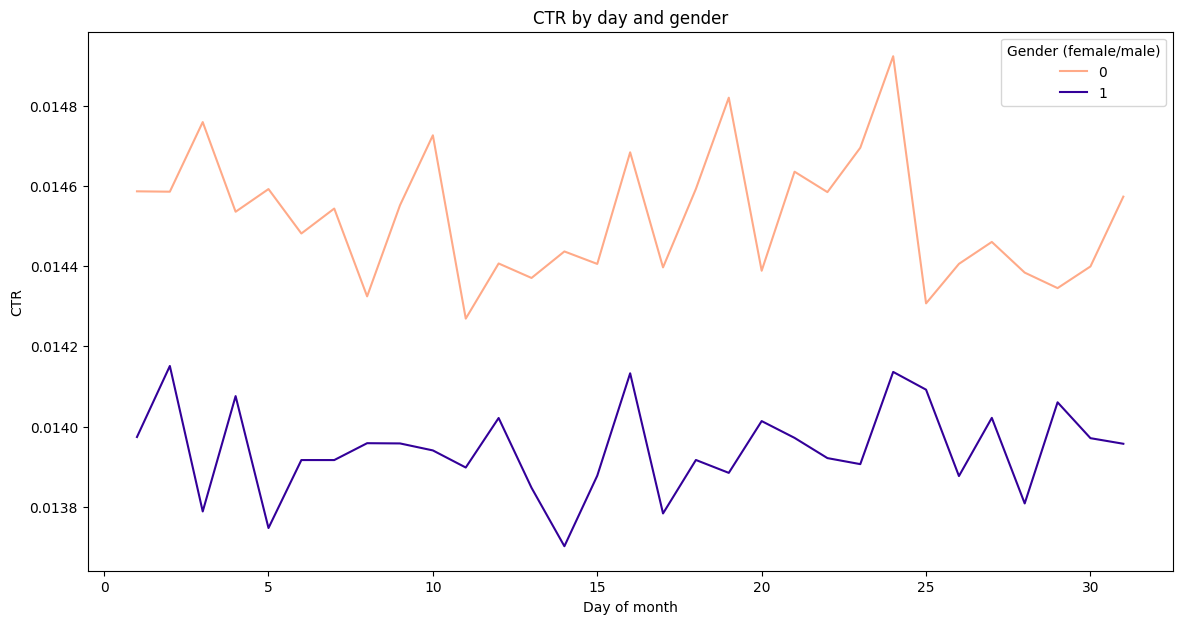

In [10]:
plt.figure(figsize=(14,7))
sb.lineplot(x='Day', y='CTR', hue='Gender', data=days_gender, palette=['#fa8','#309'])
plt.title('CTR by day and gender')
plt.xlabel('Day of month')
plt.ylabel('CTR')
plt.legend(title='Gender (female/male)', loc='upper right')

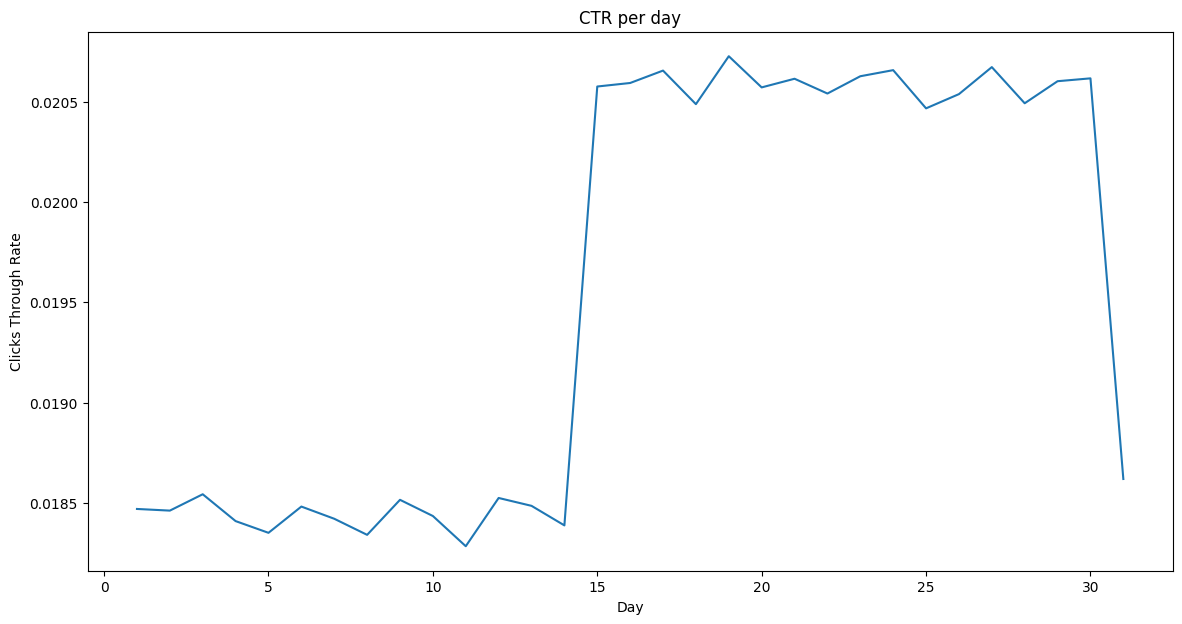

In [13]:
dataf['CTR'] = dataf['Clicks'] / dataf['Impressions']

grouped_data = dataf.groupby(['Day'])
ctr_overall = grouped_data['CTR'].mean().reset_index()

plt.figure(figsize=(14,7))
sb.lineplot(x='Day', y='CTR', data=ctr_overall)
plt.title('CTR per day')
plt.xlabel('Day')
plt.ylabel('Clicks Through Rate')

plt.show()

З аналазу цього графіку видно, що 14 числа сталася якась значна подія, через яку і відбувся значний приріст аудиторії до сайту, який поступово до кінця місяця почав згасати